In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


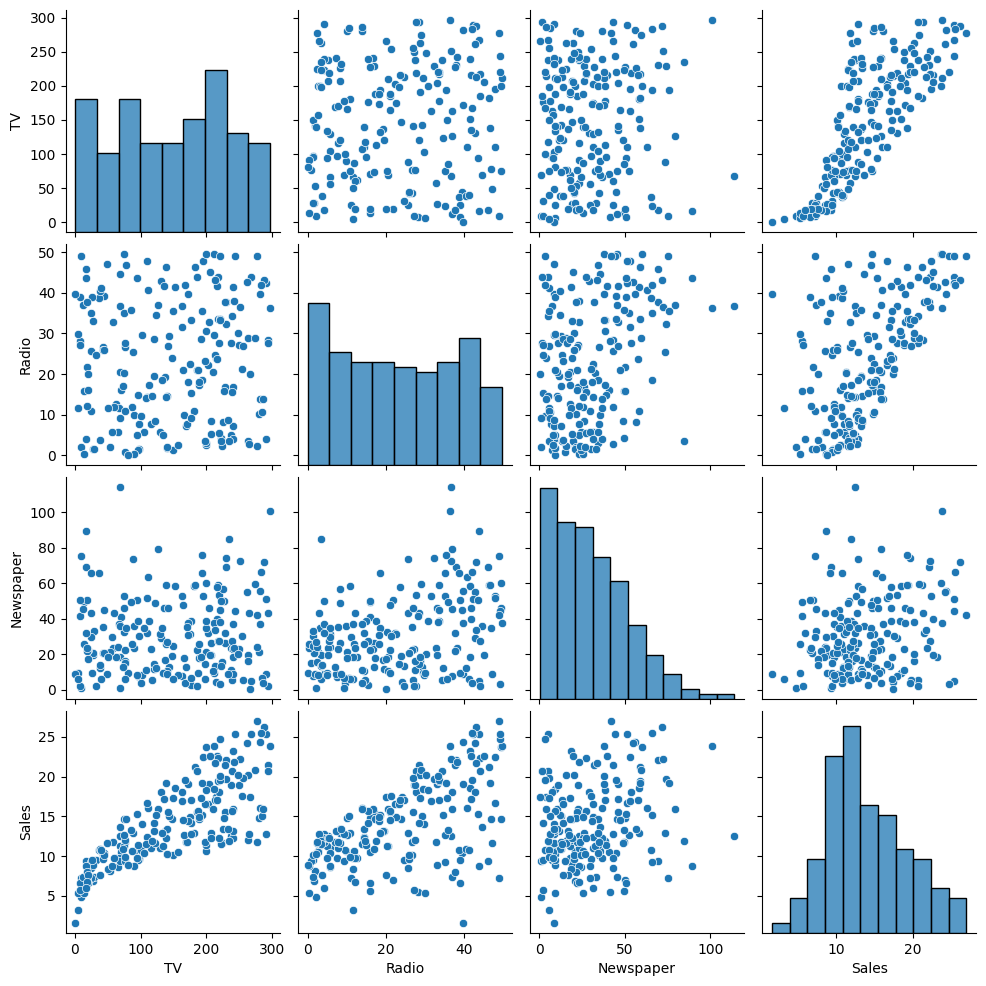

In [7]:
sns.pairplot(df)

<Axes: >

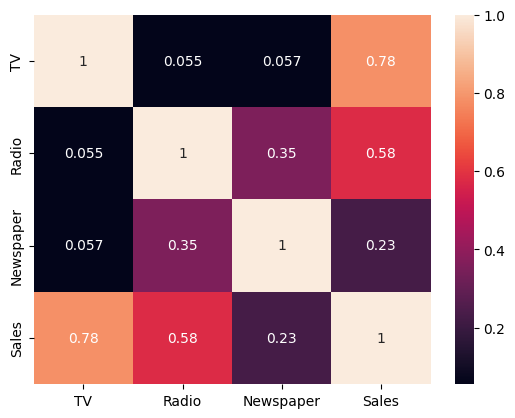

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
X=df.drop("Sales",axis=1)
Y=df["Sales"]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

### Trainging Model using Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
md=LinearRegression()
md.fit(X_train,Y_train)
Y_pr=md.predict(X_test)

In [12]:
from sklearn.metrics import r2_score,root_mean_squared_error
print("R²:", r2_score(Y_test, Y_pr))
print("RMSE:", root_mean_squared_error(Y_test, Y_pr))

R²: 0.8872436478662935
RMSE: 1.7840722497676769


Text(0.5, 1.0, 'Actual vs Predicted Sales')

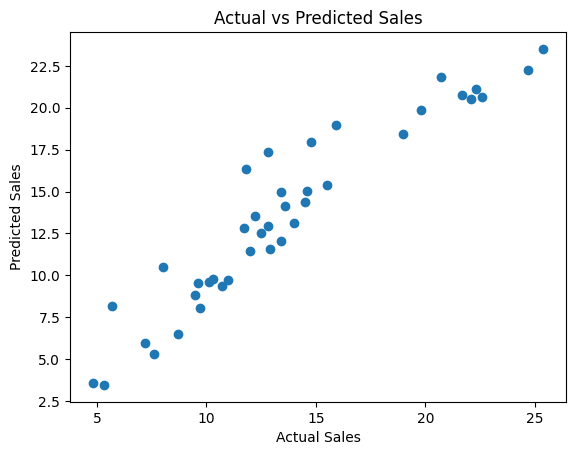

In [13]:
plt.scatter(Y_test, Y_pr)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")

### Trainging Model using Random Forest Regression

In [14]:
from sklearn.ensemble import RandomForestRegressor
md1=RandomForestRegressor(n_estimators=100,max_depth=10)
md1.fit(X_train,Y_train)
Y_pr1=md1.predict(X_test)

In [15]:
from sklearn.metrics import r2_score,root_mean_squared_error
print("R²:", r2_score(Y_test, Y_pr1))
print("RMSE:", root_mean_squared_error(Y_test, Y_pr1))

R²: 0.9813318495754783
RMSE: 0.7259263740525392


Text(0.5, 1.0, 'Actual vs Predicted Sales')

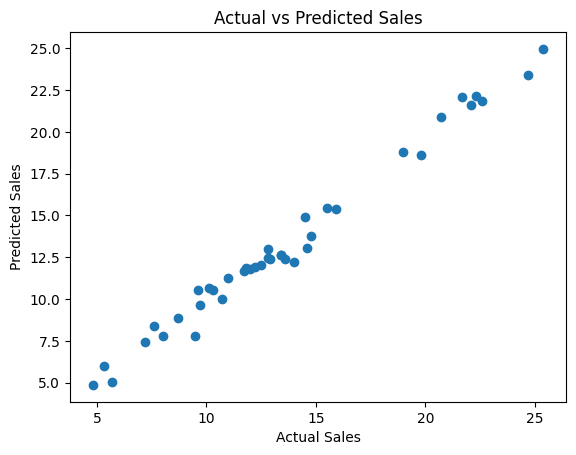

In [16]:
plt.scatter(Y_test, Y_pr1)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")

### Conclusion
- Linear Regression R²: 0.8872436478662935
- Random Forest R²: 0.9813318495754783
- Random Forest gave better accuracy and lower error, showing it handles non-linearity better.